# **Segunda Forma: Regresión Polinómica**

Importamos las librerias:

In [115]:
import random #Genera numeros aleatorios
import numpy as np #Nos ayuda a trabajar con numeros y hacer calculos
import pandas as pd #Nos ayuda a trabajar con datos en forma de tablas
import matplotlib.pyplot as plt #Grafica los datos
from sklearn.linear_model import LinearRegression #Crea modelos de predicción (en este caso, una linea que se ajusta a los datos)
from sklearn.preprocessing import PolynomialFeatures #Nos ayuda a transformar los datos
from sklearn.metrics import mean_squared_error #Nos ayuda a evaluar el modelo

Función para generar pesos en base a la altura: Si alguien es más bajo su peso será menor y si es más alto su peso será mayor

In [116]:
def generar_peso(altura):
    if altura < 1.4:
        return random.randint(40, 60)
    elif altura < 1.6:
        return random.randint(50, 70)
    elif altura < 1.8:
        return random.randint(60, 85)
    else:
        return random.randint(70, 100)


Generando datos de estatura y peso:

In [117]:
#FORMA LARGA:
alturas = []  # Creamos una lista vacía

for _ in range(100): #el _ en el for es para evitar crear una variable que no usaremos, solo lo necesitamos como una variable de marcador de posición
    altura = round(random.uniform(1.3, 2.0), 2)  # Generamos una altura aleatoria
    alturas.append(altura)  # Añadimos la altura a la lista

pesos = []  # Creamos una lista vacía para almacenar los pesos
for a in alturas:
    peso = generar_peso(a)  # Llamamos a la función para obtener el peso para la altura a
    pesos.append(peso)  # Agregamos el peso a la lista de pesos

#FORMA RESUMIDA:
#alturas = [round(random.uniform(1.3, 2.0), 2) for _ in range(100)]  # Llena la lista alturas con 100 números aleatorios entre 1.3 y 2.0, redondeados a 2 decimales.
#pesos = [generar_peso(a) for a in alturas]  # LLena la lista llamando a la función generar_peso una vez por cada elemento en la lista alturas


Para crear una tabla con los datos de altura y peso: Toma un diccionario como argumento, donde las claves se usan como nombres de las columnas y los valores se usan como datos de esas columnas

In [118]:
# 'nombre': datos(los anteriormente generados)
tabla = pd.DataFrame({
    'Altura (m)': alturas,
    'Peso (kg)': pesos
})


Guardar, cargar y mostrar los datos:

In [119]:
tabla.to_csv('TablaDeDatos.csv', index=False) #Guarda
tabla = pd.read_csv('TablaDeDatos.csv') #Carga
print("Datos cargados desde el archivo CSV:")
tabla.head(10) #Muestra

Datos cargados desde el archivo CSV:


,Altura (m),Peso (kg)
0,1.68,66
1,1.50,66
2,1.75,76
3,1.85,95
4,1.84,86
5,1.58,66
6,1.72,79
7,1.87,96
8,1.78,79
9,1.93,94


Grafica de los datos sin el ajuste de curva:

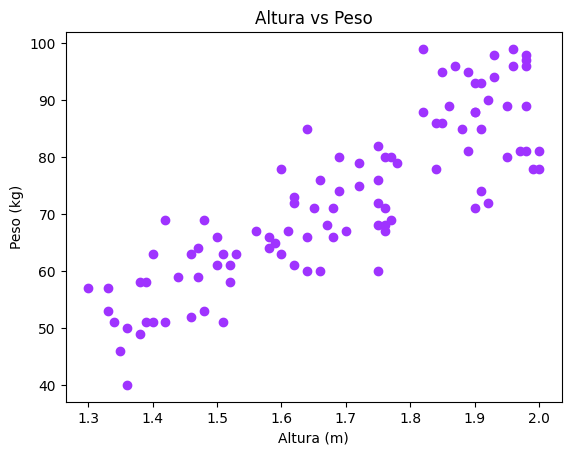

In [120]:
plt.scatter(tabla['Altura (m)'], tabla['Peso (kg)'], color='#9f33ff') #(X,Y,Color)
plt.title('Altura vs Peso') #titulo
plt.xlabel('Altura (m)') #eje x nombre
plt.ylabel('Peso (kg)') #eje y nombre
plt.show()  # Muestra la gráfica

Preparando los datos para la curva polinómica:

In [121]:
X = tabla['Altura (m)'].values.reshape(-1, 1) #lista de alturas que convertimos en un array de numpy con una sola columna
y = tabla['Peso (kg)'].values #lista de pesos
poly = PolynomialFeatures(degree=2) #grado del polinomio, ajustar una curva a los datos en lugar de solo una línea recta.
X_poly = poly.fit_transform(X) #le damos al modelo para que pueda ajustar una curva a los datos


Crear, entrenar y hacer predicciones:

In [122]:
model = LinearRegression() #crear un modelo de regresión lineal
model.fit(X_poly, y)  #entrenar el modelo con los datos transformados
y_pred = model.predict(X_poly)  #hacer predicciones con los datos transformados


Evaluación del modelo calculando el error cuadratico medio:

In [123]:
mse = mean_squared_error(y, y_pred) #calcula el error cuadratico medio
print(f"Error cuadratico medio: {mse:.2f}")  #imprime el error cuadratico medio con dos decimales


Error cuadratico medio: 53.43


Graficar con el ajuste:

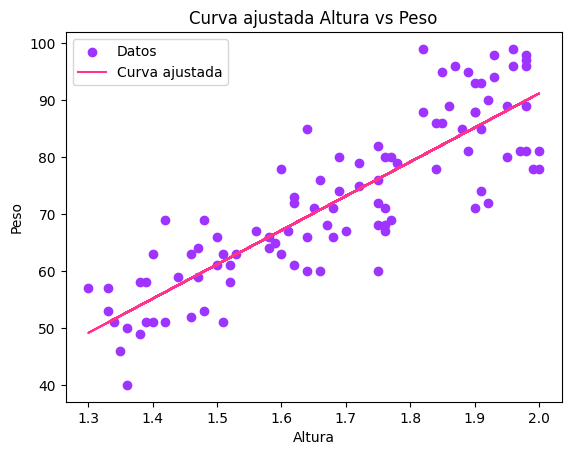

In [124]:
plt.scatter(tabla['Altura (m)'], tabla['Peso (kg)'], color='#9f33ff', label='Datos')
plt.plot(tabla['Altura (m)'], y_pred, color='#ff338d', label='Curva ajustada')
plt.title('Curva ajustada Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.show()
